#### Copyright 2019 Google LLC.

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Dataset Exploration


## Overview

### Learning Objectives

* Acquire and load dataset(s) into the Pandas structures.
* Inspect data columns description and statistics.
* Explore data to understand relationship between features.
* Draw data insights.

### Prerequisites

* Introduction to Colab
* Intermediate Python
* Intermediate Pandas
* Visualizations
* Data Exploration

# Exercises

## Exercise 1: Coding

[Kaggle](http://www.kaggle.com) hosts a [dataset containing US airline on-time statistics and delay data](https://www.kaggle.com/giovamata/airlinedelaycauses) from the [US Department of Transportation's Bureau of Transportation Statistics (BTS)](https://www.bts.gov/). In this project we will **use flight statistics data to gain insights into US airports and airlines flights in 2008**.

You are free to use any toolkit that we have covered in this class to solve the problem. That should be at least Pandas and Matplotlib or Seaborn.

Important details:

* The [dataset](https://www.kaggle.com/giovamata/airlinedelaycauses) consists of one file, DelayedFlights.csv.
* The column we are trying to predict is 'time_in_shelter_days'.
* Do not use any outcome data as features for training the model. We want to be able to predict the time in shelter for any given animal at intake.
* Not all animals have outcomes. Not all outcomes are adoption.

**Graded** demonstrations of competency:
1. Get the data into a Python object.
1. Inspect the data for columns' datatype and statistics.
1. Explore the data programmatically and visually.
1. Produce answer and visualization where applicable for at least 3 questions.  Pick from the list of questions below or come up with one yourself, and talk about any insight if any:

  * Which US airports is the busiest airports?  Decide how you'd like to measure it, eg: by annual, monthly, or daily flight traffic?
  * Of the 2008 flights that are __actually delayed__, think about:
    * Which 10 US airlines have the most delays measured it by flight count?
    * Which 10 US airlines have the most delays measured it by average length of delay?
    * Similarly, you can get the top 10 US aiports instead of airlines for the previous questions.  Which 10 US airports have the most delays measured it by flight count?
    * Which 10 US airports have the most delays measured it by flight count?
  * More analysis:
    * Is there patterns on how flight delays are distributed across different hours of the day?
    * Similarly, how about across months or season?  Maybe correllate to seasonal weather impact, holiday traffic, etc.
    * If you look at the data beyond the top 10 US airlines or airports is the data show linearity as you examine top 40 US airlines or airports.
    * Reexamine the figures you worked on above by reason for delay.
    * Drill down on particular airport, airline or even origin and arrival airport pairs - and examine flight frequencies, delays, time of day or year, etc.
  * or any questions that your team come up with.

### Student Solution

In [4]:
import altair as alt
import numpy as np 
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns

dataset_filename = "./DelayedFlights.csv"
delayed_flights =pd.read_csv(dataset_filename)

In [5]:
delayed_flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
delayed_flights.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Data cleaning - Check null value for Origin and Destination airports

In [7]:
n = len(delayed_flights)
print("Origin: "+ str(n-delayed_flights['Origin'].isnull().value_counts().values.tolist()[0]))
print("Dest: "+str(n-delayed_flights['Dest'].isnull().value_counts().values.tolist()[0]))

Origin: 0
Dest: 0


In [8]:
delayed_flights['DepTime'] = delayed_flights['DepTime'].astype(int)


# **The the busiest airports - by annual and monthly**

**Monthly analysis of delayed situation for airports**


In [9]:
delayed_flights['Month Origin Count']= delayed_flights['Origin']
origin_month = delayed_flights.groupby(['Month','Origin'])[['Month Origin Count']].count().sort_values(by='Month Origin Count', ascending=False)
origin_month.head(5)

,,Month Origin Count
Month,Origin,
7,ATL,14609
3,ATL,14449
12,ATL,14130
6,ORD,14032
1,ORD,13938


In [10]:
delayed_flights['Month Dest Count']= delayed_flights['Dest']
dest_month = delayed_flights.groupby(['Month','Dest'])[['Month Dest Count']].count().sort_values(by='Month Dest Count', ascending=False)
dest_month.head(5)

,,Month Dest Count
Month,Dest,
6,ORD,13182
12,ATL,12437
1,ORD,11908
7,ATL,11586
2,ORD,11280


**Annual analysis of delayed situation for airports**

By origin and destination airport

In [11]:
delayed_flights['Origin Count']= delayed_flights['Origin']
origin_annual = delayed_flights.groupby(['Origin'])[['Origin Count']].count().sort_values(by='Origin Count', ascending=False)
origin_annual.head(5)

,Origin Count
Origin,
ATL,131613
ORD,125979
DFW,95414
DEN,74323
LAX,58772


In [12]:
delayed_flights['Dest Count']= delayed_flights['Dest']
dest_annual = delayed_flights.groupby(['Dest'])[['Dest Count']].count().sort_values(by='Dest Count', ascending=False)
dest_annual.head(5)

,Dest Count
Dest,
ORD,108984
ATL,106898
DFW,70657
DEN,63003
LAX,59969


Airport sum for delays as origin and destination airports

In [13]:
merge_month_count = pd.merge(origin_month, dest_month,left_index=True, right_index=True)
merge_month_count['Sum'] = merge_month_count['Month Origin Count']+merge_month_count['Month Dest Count']
merge_month_count.sort_values(by='Sum', ascending=False).head(5)

,,,Month Origin Count,Month Dest Count,Sum
Month,Origin,Dest,,,
6,ORD,ORD,14032,13182,27214
12,ATL,ATL,14130,12437,26567
7,ATL,ATL,14609,11586,26195
1,ORD,ORD,13938,11908,25846
3,ATL,ATL,14449,11121,25570


In [14]:
merge_count = pd.merge(origin_annual, dest_annual,left_index=True, right_index=True)
merge_count['Sum'] = merge_count['Origin Count']+merge_count['Dest Count']
merge_count.sort_values(by='Sum', ascending=False).head(5)

,Origin Count,Dest Count,Sum
ATL,131613,106898,238511
ORD,125979,108984,234963
DFW,95414,70657,166071
DEN,74323,63003,137326
LAX,58772,59969,118741


# Airlines Delay Situation

Which 10 US airlines have the most delays measured it by flight count?

In [15]:
delayed_flights['UniqueCarrier Count']= delayed_flights['UniqueCarrier']
airline_delay = delayed_flights.groupby(['UniqueCarrier'])[['UniqueCarrier Count']].count().sort_values(by='UniqueCarrier Count', ascending=False)
airline_delay

,UniqueCarrier Count
UniqueCarrier,
WN,377602
AA,191865
MQ,141920
UA,141426
OO,132433
DL,114238
XE,103663
CO,100195
US,98425


Which 10 US airlines have the most delays measured it by average length of delay?

In [16]:
delayed_flights['Average Delay Length']= delayed_flights['DepDelay']
average_airline = delayed_flights.groupby(['UniqueCarrier'])[['Average Delay Length']].mean().sort_values(by='Average Delay Length', ascending=False)
average_airline.head(10)

,Average Delay Length
UniqueCarrier,
YV,55.430655
B6,55.030570
XE,50.098444
UA,49.985710
OH,48.937311
EV,48.308463
9E,47.370338
AA,46.481953
OO,44.790943


More analysis on airports data

In [17]:
average_airline_airport = delayed_flights.groupby(['UniqueCarrier','Origin'])[['Average Delay Length']].count().sort_values(by='Average Delay Length', ascending=False)
top= average_airline_airport
top.head

<bound method NDFrame.head of                       Average Delay Length
UniqueCarrier Origin                      
AA            DFW                    57600
DL            ATL                    46463
EV            ATL                    41902
UA            ORD                    34954
WN            LAS                    31581
MQ            ORD                    30963
CO            IAH                    30624
MQ            DFW                    30088
FL            ATL                    28612
UA            DEN                    27028
WN            MDW                    26945
AA            ORD                    25884
WN            PHX                    23861
CO            EWR                    23275
NW            DTW                    23246
XE            IAH                    21646
US            CLT                    20516
NW            MSP                    20406
XE            EWR                    19514
WN            BWI                    19503
              HOU       

Specific analysis of top 3 busiest airport

EA and MQ airlines at DFW 

AA delays at DFW with carrier: 27839
AA delays at DFW with NAS: 20826
AA delays at DFW with late aircraft: 19890
AA delays at DFW with weather: 4157
AA delays at DFW with security: 14

MQ delays at DFW with carrier: 13856
MQ delays at DFW with NAS: 7877
MQ delays at DFW with late aircraft: 9803
MQ delays at DFW with weather: 2596
MQ delays at DFW with security: 2



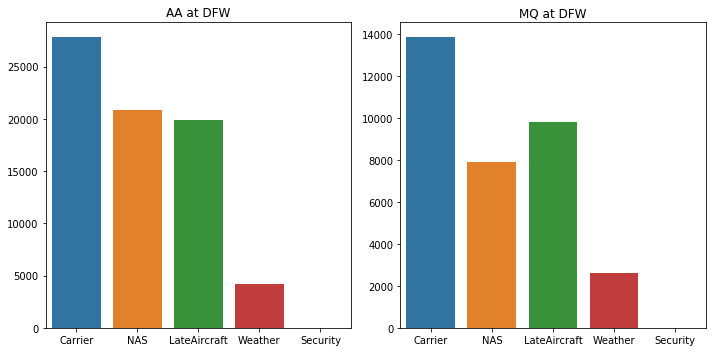

In [18]:
DFW = delayed_flights.loc[delayed_flights['Origin'] == 'DFW']
DFW.groupby('UniqueCarrier')[['UniqueCarrier']].count()

reason_plot_labels = ['Carrier','NAS','LateAircraft','Weather','Security']

AADFW = DFW.loc[DFW['UniqueCarrier'] == 'AA']
AADFW_data = AADFW.CarrierDelay.fillna(0).astype(bool).sum(axis=0),\
             AADFW.NASDelay.fillna(0).astype(bool).sum(axis=0),\
             AADFW.LateAircraftDelay.fillna(0).astype(bool).sum(axis=0),\
             AADFW.WeatherDelay.fillna(0).astype(bool).sum(axis=0),\
              AADFW.SecurityDelay.fillna(0).astype(bool).sum(axis=0)
print('AA delays at DFW with carrier: '+str(AADFW_data[0]))
print('AA delays at DFW with NAS: '+str(AADFW_data[1]))
print('AA delays at DFW with late aircraft: '+str(AADFW_data[2]))
print('AA delays at DFW with weather: '+str(AADFW_data[3]))
print('AA delays at DFW with security: '+str(AADFW_data[4])+'\n')

MQDFW = DFW.loc[DFW['UniqueCarrier'] == 'MQ']
MQDFW_data = MQDFW.CarrierDelay.fillna(0).astype(bool).sum(axis=0),\
             MQDFW.NASDelay.fillna(0).astype(bool).sum(axis=0),\
             MQDFW.LateAircraftDelay.fillna(0).astype(bool).sum(axis=0),\
             MQDFW.WeatherDelay.fillna(0).astype(bool).sum(axis=0),\
              MQDFW.SecurityDelay.fillna(0).astype(bool).sum(axis=0)
print('MQ delays at DFW with carrier: '+str(MQDFW_data[0]))
print('MQ delays at DFW with NAS: '+str(MQDFW_data[1]))
print('MQ delays at DFW with late aircraft: '+str(MQDFW_data[2]))
print('MQ delays at DFW with weather: '+str(MQDFW_data[3]))
print('MQ delays at DFW with security: '+str(MQDFW_data[4])+'\n')

AA_DFW_Reason_Plot = pd.Series(AADFW_data, index=reason_plot_labels)
MQ_DFW_Reason_Plot = pd.Series(MQDFW_data, index=reason_plot_labels)

f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.barplot(AA_DFW_Reason_Plot.index, AA_DFW_Reason_Plot.values,ax=axes[0])
axes[0].title.set_text("AA at DFW") 
sns.barplot(MQ_DFW_Reason_Plot.index, MQ_DFW_Reason_Plot.values,ax=axes[1])
axes[1].title.set_text("MQ at DFW") 
plt.tight_layout()



DL and EV airlines at ATL

DL delays at ATL with carrier: 19425
DL delays at ATL with NAS: 18708
DL delays at ATL with late aircraft: 15861
DL delays at ATL with weather: 2612
DL delays at ATL with security: 3

EV delays at ATL with carrier: 21216
EV delays at ATL with NAS: 14138
EV delays at ATL with late aircraft: 6951
EV delays at ATL with weather: 4532
EV delays at ATL with security: 42


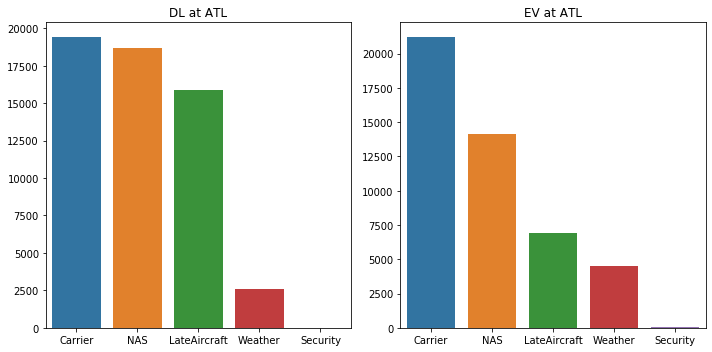

In [19]:
ATL = delayed_flights.loc[delayed_flights['Origin'] == 'ATL']
ATL.groupby('UniqueCarrier')[['UniqueCarrier']].count()
reason_plot_labels = ['Carrier','NAS','LateAircraft','Weather','Security']

DLATL = ATL.loc[ATL['UniqueCarrier'] == 'DL']
DLATL_data = DLATL.CarrierDelay.fillna(0).astype(bool).sum(axis=0),\
             DLATL.NASDelay.fillna(0).astype(bool).sum(axis=0),\
             DLATL.LateAircraftDelay.fillna(0).astype(bool).sum(axis=0),\
             DLATL.WeatherDelay.fillna(0).astype(bool).sum(axis=0),\
              DLATL.SecurityDelay.fillna(0).astype(bool).sum(axis=0)
print('DL delays at ATL with carrier: '+str(DLATL_data[0]))
print('DL delays at ATL with NAS: '+str(DLATL_data[1]))
print('DL delays at ATL with late aircraft: '+str(DLATL_data[2]))
print('DL delays at ATL with weather: '+str(DLATL_data[3]))
print('DL delays at ATL with security: '+str(DLATL_data[4])+'\n')

EVATL = ATL.loc[ATL['UniqueCarrier'] == 'EV']
EVATL_data = EVATL.CarrierDelay.fillna(0).astype(bool).sum(axis=0),\
             EVATL.NASDelay.fillna(0).astype(bool).sum(axis=0),\
             EVATL.LateAircraftDelay.fillna(0).astype(bool).sum(axis=0),\
             EVATL.WeatherDelay.fillna(0).astype(bool).sum(axis=0),\
              EVATL.SecurityDelay.fillna(0).astype(bool).sum(axis=0)
print('EV delays at ATL with carrier: '+str(EVATL_data[0]))
print('EV delays at ATL with NAS: '+str(EVATL_data[1]))
print('EV delays at ATL with late aircraft: '+str(EVATL_data[2]))
print('EV delays at ATL with weather: '+str(EVATL_data[3]))
print('EV delays at ATL with security: '+str(EVATL_data[4]))

DL_ATL_Reason_Plot = pd.Series(DLATL_data, index=reason_plot_labels)
EV_ATL_Reason_Plot = pd.Series(EVATL_data, index=reason_plot_labels)

f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.barplot(DL_ATL_Reason_Plot.index, DL_ATL_Reason_Plot.values,ax=axes[0])
axes[0].title.set_text("DL at ATL") 
sns.barplot(EV_ATL_Reason_Plot.index, EV_ATL_Reason_Plot.values,ax=axes[1])
axes[1].title.set_text("EV at ATL") 
plt.tight_layout()




UA and MQ at ORD 

UA delays at ORD with carrier: 13601
UA delays at ORD with NAS: 11818
UA delays at ORD with late aircraft: 15653
UA delays at ORD with weather: 2414
UA delays at ORD with security: 0

MQ delays at ORD with carrier: 12105
MQ delays at ORD with NAS: 13254
MQ delays at ORD with late aircraft: 13351
MQ delays at ORD with weather: 4121
MQ delays at ORD with security: 1



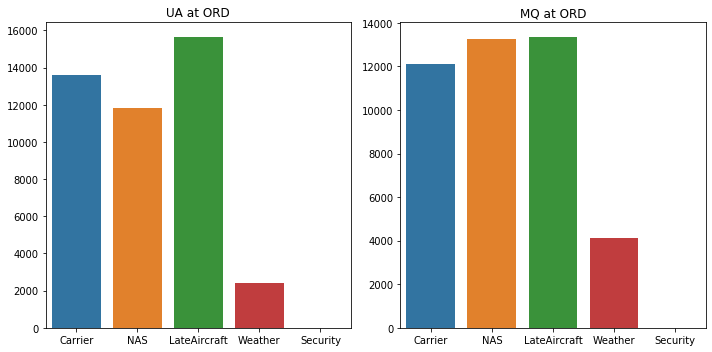

In [20]:
ORD = delayed_flights.loc[delayed_flights['Origin'] == 'ORD']
ORD.groupby('UniqueCarrier')[['UniqueCarrier']].count()
reason_plot_labels = ['Carrier','NAS','LateAircraft','Weather','Security']
UAORD = ORD.loc[ORD['UniqueCarrier'] == 'UA']
UAORD_data = UAORD.CarrierDelay.fillna(0).astype(bool).sum(axis=0),\
             UAORD.NASDelay.fillna(0).astype(bool).sum(axis=0),\
             UAORD.LateAircraftDelay.fillna(0).astype(bool).sum(axis=0),\
             UAORD.WeatherDelay.fillna(0).astype(bool).sum(axis=0),\
              UAORD.SecurityDelay.fillna(0).astype(bool).sum(axis=0)
print('UA delays at ORD with carrier: '+str(UAORD_data[0]))
print('UA delays at ORD with NAS: '+str(UAORD_data[1]))
print('UA delays at ORD with late aircraft: '+str(UAORD_data[2]))
print('UA delays at ORD with weather: '+str(UAORD_data[3]))
print('UA delays at ORD with security: '+str(UAORD_data[4])+'\n')

MQORD = ORD.loc[ORD['UniqueCarrier'] == 'MQ']
MQORD_data = MQORD.CarrierDelay.fillna(0).astype(bool).sum(axis=0),\
             MQORD.NASDelay.fillna(0).astype(bool).sum(axis=0),\
             MQORD.LateAircraftDelay.fillna(0).astype(bool).sum(axis=0),\
             MQORD.WeatherDelay.fillna(0).astype(bool).sum(axis=0),\
              MQORD.SecurityDelay.fillna(0).astype(bool).sum(axis=0)
print('MQ delays at ORD with carrier: '+str(MQORD_data[0]))
print('MQ delays at ORD with NAS: '+str(MQORD_data[1]))
print('MQ delays at ORD with late aircraft: '+str(MQORD_data[2]))
print('MQ delays at ORD with weather: '+str(MQORD_data[3]))
print('MQ delays at ORD with security: '+str(MQORD_data[4])+'\n')

UA_ORD_Reason_Plot = pd.Series(UAORD_data, index=reason_plot_labels)
MQ_ORD_Reason_Plot = pd.Series(MQORD_data, index=reason_plot_labels)

f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.barplot(UA_ORD_Reason_Plot.index, UA_ORD_Reason_Plot.values,ax=axes[0])
axes[0].title.set_text("UA at ORD") 
sns.barplot(MQ_ORD_Reason_Plot.index, MQ_ORD_Reason_Plot.values,ax=axes[1])
axes[1].title.set_text("MQ at ORD") 
plt.tight_layout()

# Airports Delay Situation 

Which 10 US airports have the most delays measured it by flight count?

In [21]:
merge_count.head(10)

,Origin Count,Dest Count,Sum
ATL,131613,106898,238511
ORD,125979,108984,234963
DFW,95414,70657,166071
DEN,74323,63003,137326
LAX,58772,59969,118741
IAH,56847,43905,100752
PHX,55720,47836,103556
LAS,53710,48858,102568
EWR,52925,55861,108786
DTW,43923,34777,78700


Which 10 US airports have the most delays measured it by average length of delay?

In [22]:
delayed_flights['Airport Average Delay Length']= delayed_flights['DepDelay']
average_airport = delayed_flights.groupby(['Origin'])[['Airport Average Delay Length']].mean().sort_values(by='Airport Average Delay Length', ascending=False)
average_airport.head(10)

,Airport Average Delay Length
Origin,
CMX,116.147059
PLN,93.761905
SPI,83.848739
ALO,82.225806
MQT,79.556650
ACY,79.310345
MOT,78.661654
HHH,76.530055
EGE,74.128920


# Time factor for delays

Is there patterns on how flight delays are distributed across different hours of the day?

In [23]:
delayed_flights['DepTime'] = delayed_flights['DepTime'].astype(int)

In [24]:
time_bins = [0, 600, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]
time_cat_names = ['0:00-6:00', '6:00-10:00', '10:00-12:00','12:00-14:00','14:00-16:00','16:00-18:00', '18:00-20:00','20:00-22:00','22:00-24:00']
delayed_flights['Time range'] = pd.cut(delayed_flights['DepTime'], time_bins, labels = time_cat_names)
delayed_flights.groupby(['Time range'])['Time range'].count()


Time range
0:00-6:00       20878
6:00-10:00     239972
10:00-12:00    218192
12:00-14:00    250173
14:00-16:00    274411
16:00-18:00    299782
18:00-20:00    302680
20:00-22:00    240637
22:00-24:00     90033
Name: Time range, dtype: int64

Bar plot for the flight delays across hours of the day

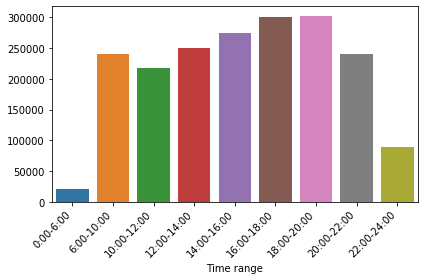

In [25]:
Timedata = pd.Series(delayed_flights.groupby(['Time range'])['Time range'].count(), index=time_cat_names)
ax = sns.barplot(Timedata.index, Timedata.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Season and Month Analysis 

**Seasonal delay summary**

In [26]:
month_to_season_lu = np.array([
    None,
    'Winter', 'Winter',
    'Spring', 'Spring', 'Spring',
    'Summer', 'Summer', 'Summer',
    'Fall', 'Fall', 'Fall',
    'Winter'
])
delayed_flights['Season range'] = month_to_season_lu[delayed_flights['Month']]
season_delay_count =  delayed_flights.groupby(['Season range'])['Season range'].count()
season_delay_count

Season range
Fall      304627
Spring    509178
Summer    546507
Winter    576446
Name: Season range, dtype: int64

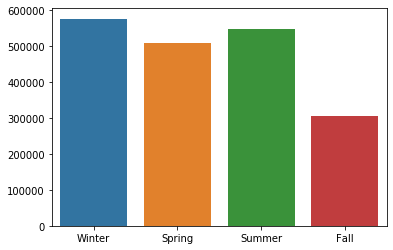

In [27]:
SeasonPlot = pd.Series(season_delay_count, index=month_to_season_lu)
sns.barplot(SeasonPlot.index, SeasonPlot.values)

Check data for different delay types




In [28]:
n = len(delayed_flights)
print(n)
print("CarrierDelay: "+ str(n-delayed_flights['CarrierDelay'].isnull().value_counts().values.tolist()[0]))
print("WeatherDelay: "+ str(n-delayed_flights['WeatherDelay'].isnull().value_counts().values.tolist()[0]))
print("LateAircraftDelay: "+ str(n-delayed_flights['LateAircraftDelay'].isnull().value_counts().values.tolist()[0]))
print("SecurityDelay: "+ str(n-delayed_flights['SecurityDelay'].isnull().value_counts().values.tolist()[0]))
print("NASDelay: "+ str(n-delayed_flights['NASDelay'].isnull().value_counts().values.tolist()[0]))

1936758
CarrierDelay: 689270
WeatherDelay: 689270
LateAircraftDelay: 689270
SecurityDelay: 689270
NASDelay: 689270


**Seasonal Carrier Delay**

In [29]:
season_carrier_delay = delayed_flights.groupby(['Season range'])['CarrierDelay'].sum()
season_carrier_delay

Season range
Fall      3464345.0
Spring    6145115.0
Summer    7005947.0
Winter    7310663.0
Name: CarrierDelay, dtype: float64

Bar plot for the seaonal Carrier delay

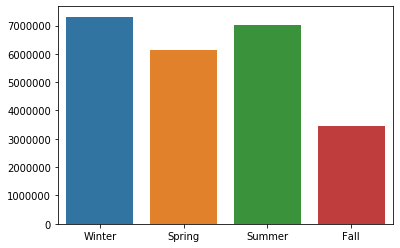

In [30]:
CarrierSeasonPlot = pd.Series(season_carrier_delay, index=month_to_season_lu)
sns.barplot(CarrierSeasonPlot.index, CarrierSeasonPlot.values)

**Seasonal Weather Delay**

In [31]:
season_weather_delay = delayed_flights.groupby(['Season range'])['WeatherDelay'].sum()
season_weather_delay

Season range
Fall       400724.0
Spring     980478.0
Summer    1524153.0
Winter    1714805.0
Name: WeatherDelay, dtype: float64

Bar plot for the seaonal weather delay

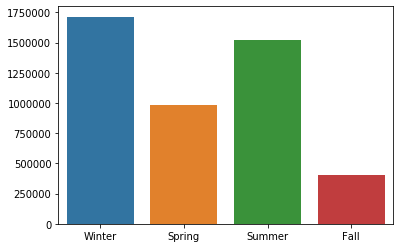

In [32]:
WeatherSeasonPlot = pd.Series(season_weather_delay, index=month_to_season_lu)
sns.barplot(WeatherSeasonPlot.index, WeatherSeasonPlot.values)

**Seasonal Late Aircraft Delay**

In [33]:
season_aircraft_delay = delayed_flights.groupby(['Season range'])['LateAircraftDelay'].sum()
season_aircraft_delay

Season range
Fall       3734843.0
Spring     7860422.0
Summer     9130573.0
Winter    10831200.0
Name: LateAircraftDelay, dtype: float64

Bar plot for the seaonal late aircraft delay

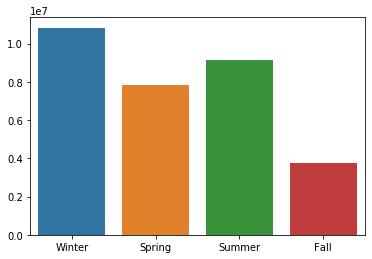

In [34]:
LateAircraftSeasonPlot= pd.Series(season_aircraft_delay,index=month_to_season_lu)
sns.barplot(LateAircraftSeasonPlot.index, LateAircraftSeasonPlot.values)

**Seasonal NAS Delay**

In [35]:
season_NAS_delay = delayed_flights.groupby(['Season range'])['NASDelay'].sum()
season_NAS_delay

Season range
Fall      2570779.0
Spring    4447042.0
Summer    5970455.0
Winter    5751034.0
Name: NASDelay, dtype: float64

Bar plot for the seaonal NAS delay

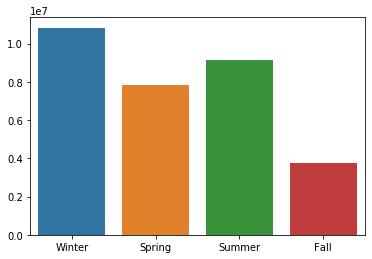

In [36]:
NASSeasonPlot= pd.Series(season_aircraft_delay,index=month_to_season_lu)
sns.barplot(NASSeasonPlot.index, NASSeasonPlot.values)

**Seasonal Security Delay**

In [37]:
season_Security_delay = delayed_flights.groupby(['Season range'])['SecurityDelay'].sum()
season_Security_delay


Season range
Fall      13931.0
Spring    31924.0
Summer    31025.0
Winter    35565.0
Name: SecurityDelay, dtype: float64

Bar plot for the seaonal security delay

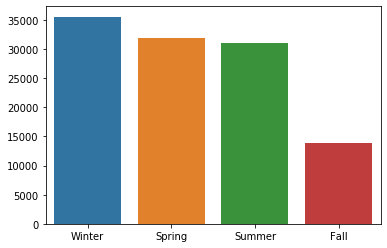

In [38]:
SecuritySeasonPlot= pd.Series(season_Security_delay,index=month_to_season_lu)
sns.barplot(SecuritySeasonPlot.index, SecuritySeasonPlot.values)

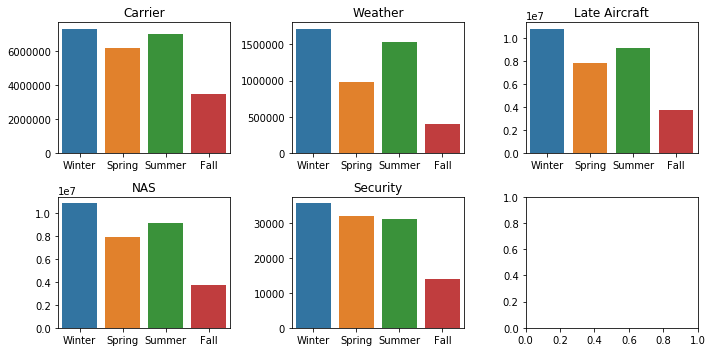

In [39]:
f, axes = plt.subplots(2, 3,figsize=(10,5))
sns.barplot(CarrierSeasonPlot.index, CarrierSeasonPlot.values,ax=axes[0,0])
axes[0,0].title.set_text("Carrier") 
sns.barplot(WeatherSeasonPlot.index, WeatherSeasonPlot.values,ax=axes[0,1])
axes[0,1].title.set_text("Weather") 
sns.barplot(LateAircraftSeasonPlot.index, LateAircraftSeasonPlot.values, ax=axes[0,2])
axes[0,2].title.set_text("Late Aircraft") 
sns.barplot(NASSeasonPlot.index, NASSeasonPlot.values, ax=axes[1,0])
axes[1,0].title.set_text("NAS")
sns.barplot(SecuritySeasonPlot.index, SecuritySeasonPlot.values, ax=axes[1,1])
axes[1,1].title.set_text("Security")
plt.tight_layout()


**Monthly  delay summary**

In [40]:
delayed_flights.groupby(['Month'])['Month'].count()

Month
1     183527
2     189534
3     200842
4     155264
5     153072
6     200914
7     182945
8     162648
9      95539
10    103525
11    105563
12    203385
Name: Month, dtype: int64

Check data for different delay types and its data in different months

**Monthly Carrier Delay**

In [41]:
month_carrier_delay = delayed_flights.groupby(['Month'])['CarrierDelay'].sum()
month_carrier_delay

Month
1     2337749.0
2     2382701.0
3     2513682.0
4     1919024.0
5     1712409.0
6     2474278.0
7     2408221.0
8     2123448.0
9     1211821.0
10    1138782.0
11    1113742.0
12    2590213.0
Name: CarrierDelay, dtype: float64

Bar plot for the monthly carrier delay

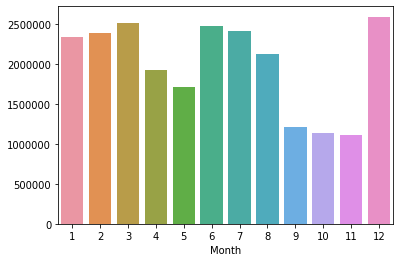

In [42]:
MonthCarrierPlot = pd.Series(month_carrier_delay, index=delayed_flights.Month)
sns.barplot(MonthCarrierPlot.index, MonthCarrierPlot.values)

**Monthly Weather Delay**

In [43]:
month_weather_delay = delayed_flights.groupby(['Month'])['WeatherDelay'].sum()
month_weather_delay

Month
1     426381.0
2     541737.0
3     472998.0
4     268284.0
5     239196.0
6     570591.0
7     555051.0
8     398511.0
9     156646.0
10    104805.0
11    139273.0
12    746687.0
Name: WeatherDelay, dtype: float64

Bar plot for the monthly weather delay

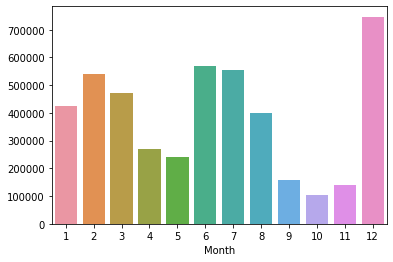

In [44]:
MonthWeatherPlot = pd.Series(month_weather_delay, index=delayed_flights.Month)
sns.barplot(MonthWeatherPlot.index, MonthWeatherPlot.values)

**Monthly Aircraft Delay**

In [45]:
month_aircraft_delay = delayed_flights.groupby(['Month'])['LateAircraftDelay'].sum()
month_aircraft_delay

Month
1     3098475.0
2     3455127.0
3     3341349.0
4     2276109.0
5     2242964.0
6     3579121.0
7     3061884.0
8     2489568.0
9     1062366.0
10    1148420.0
11    1524057.0
12    4277598.0
Name: LateAircraftDelay, dtype: float64

Bar plot for the monthly late aircraft delay

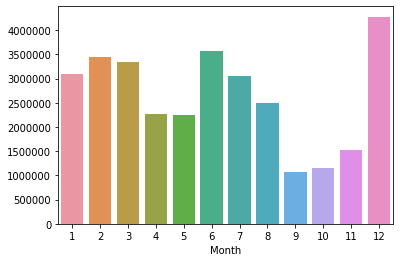

In [46]:
MonthAircraftPlot = pd.Series(month_aircraft_delay, index=delayed_flights.Month)
sns.barplot(MonthAircraftPlot.index, MonthAircraftPlot.values)

**Monthly NAS Delay**

In [47]:
month_NAS_delay = delayed_flights.groupby(['Month'])['NASDelay'].sum()
month_NAS_delay

Month
1     1740200.0
2     1870900.0
3     1790009.0
4     1329298.0
5     1327735.0
6     2398325.0
7     2090920.0
8     1481210.0
9      790748.0
10     704551.0
11    1075480.0
12    2139934.0
Name: NASDelay, dtype: float64

Bar plot for the monthly NAS delay

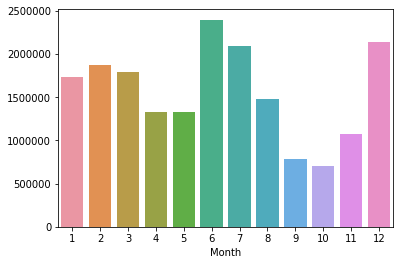

In [48]:
MonthNASPlot = pd.Series(month_NAS_delay, index=delayed_flights.Month)
sns.barplot(MonthNASPlot.index, MonthNASPlot.values)

**Monthly Security Delay**

In [49]:
month_Security_delay = delayed_flights.groupby(['Month'])['SecurityDelay'].sum()
month_Security_delay

Month
1     12406.0
2     11075.0
3     14651.0
4      7574.0
5      9699.0
6     10548.0
7     13095.0
8      7382.0
9      4747.0
10     5188.0
11     3996.0
12    12084.0
Name: SecurityDelay, dtype: float64

Bar plot for the monthly Security delay

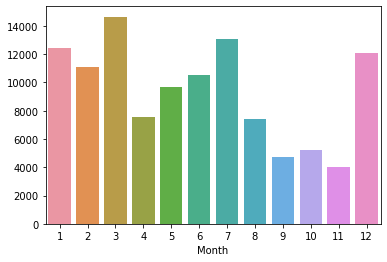

In [50]:
MonthSecurityPlot = pd.Series(month_Security_delay, index=delayed_flights.Month)
sns.barplot(MonthSecurityPlot.index, MonthSecurityPlot.values)

**Integrated monthly barplots for different types of delay** 

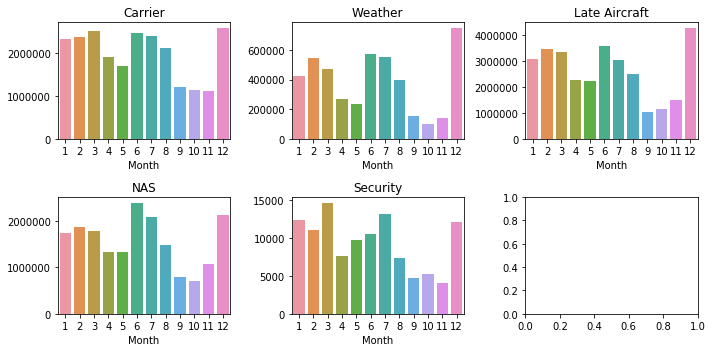

In [51]:

f, axes = plt.subplots(2, 3,figsize=(10,5))
sns.barplot(MonthCarrierPlot.index, MonthCarrierPlot.values,ax=axes[0,0])
axes[0,0].title.set_text("Carrier") 
sns.barplot(MonthWeatherPlot.index, MonthWeatherPlot.values,ax=axes[0,1])
axes[0,1].title.set_text("Weather") 
sns.barplot(MonthAircraftPlot.index, MonthAircraftPlot.values, ax=axes[0,2])
axes[0,2].title.set_text("Late Aircraft") 
sns.barplot(MonthNASPlot.index, MonthNASPlot.values, ax=axes[1,0])
axes[1,0].title.set_text("NAS")
sns.barplot(MonthSecurityPlot.index, MonthSecurityPlot.values, ax=axes[1,1])
axes[1,1].title.set_text("Security")
plt.tight_layout()


In [52]:
Airports = pd.DataFrame(origin_annual)

airportsWeather = delayed_flights.groupby(['Origin'])[['WeatherDelay']].sum().sort_values(by='WeatherDelay',ascending = False)
airportsNASDelay = delayed_flights.groupby(['Origin'])[['NASDelay']].sum().sort_values(by='NASDelay', ascending = False)
airportsSecurityDelay = delayed_flights.groupby(['Origin'])[['SecurityDelay']].sum().sort_values(by='SecurityDelay', ascending = False)
airportsLateAircraftDelay = delayed_flights.groupby(['Origin'])[['LateAircraftDelay']].sum().sort_values(by='LateAircraftDelay', ascending = False)
Airports['Weather Delay'] = airportsWeather
Airports['NAS Delay'] = airportsNASDelay
Airports['Security Delay'] = airportsSecurityDelay
Airports['Late Aircraft Delay'] = airportsLateAircraftDelay

In [53]:
delayed_flights.groupby(['Cancelled','CancellationCode'])[['CancellationCode']].count()

CancellationCode
Cancelled CancellationCode                  
0         N                          1936125
1         A                              246
          B                              307
          C                               80

#Plot Comparisions for airports and monthly delays

**Normalized Bar Graph ATL, ORD, DFW vs. CMX, PLN, SPI**

In [54]:
ATLDelay = delayed_flights.loc[(delayed_flights['Origin'] == 'ATL')]
ORDDelay = delayed_flights.loc[(delayed_flights['Origin'] == 'ORD')]
DFWDelay = delayed_flights.loc[(delayed_flights['Origin'] == 'DFW')]

CMXDelay = delayed_flights.loc[(delayed_flights['Origin'] == 'CMX')]
PLNDelay = delayed_flights.loc[(delayed_flights['Origin'] == 'PLN')]
SPIDelay = delayed_flights.loc[(delayed_flights['Origin'] == 'SPI')]
DelayMinutesArray = [ATLDelay['CarrierDelay'].sum(),ATLDelay['WeatherDelay'].sum(),ATLDelay['NASDelay'].sum(),
            ATLDelay['SecurityDelay'].sum(), ATLDelay['LateAircraftDelay'].sum(),ORDDelay['CarrierDelay'].sum(),ORDDelay['WeatherDelay'].sum(),ORDDelay['NASDelay'].sum(),
            ORDDelay['SecurityDelay'].sum(), ORDDelay['LateAircraftDelay'].sum(),DFWDelay['CarrierDelay'].sum(),DFWDelay['WeatherDelay'].sum(),DFWDelay['NASDelay'].sum(),
            DFWDelay['SecurityDelay'].sum(), DFWDelay['LateAircraftDelay'].sum(),CMXDelay['CarrierDelay'].sum(),CMXDelay['WeatherDelay'].sum(),CMXDelay['NASDelay'].sum(),
            CMXDelay['SecurityDelay'].sum(), CMXDelay['LateAircraftDelay'].sum(),PLNDelay['CarrierDelay'].sum(),PLNDelay['WeatherDelay'].sum(),PLNDelay['NASDelay'].sum(),
            PLNDelay['SecurityDelay'].sum(), PLNDelay['LateAircraftDelay'].sum(),SPIDelay['CarrierDelay'].sum(),SPIDelay['WeatherDelay'].sum(),SPIDelay['NASDelay'].sum(),
            SPIDelay['SecurityDelay'].sum(), SPIDelay['LateAircraftDelay'].sum()]
AirportArray = ['ATL','ATL','ATL','ATL','ATL','ORD','ORD','ORD','ORD','ORD',
                'DFW','DFW','DFW','DFW','DFW','CMX','CMX','CMX','CMX','CMX',
               'PLN','PLN','PLN','PLN','PLN','SPI','SPI','SPI','SPI','SPI']
siteListIndex = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay',
                 'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay',
                'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay',
                'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay',
                'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay',
                'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']


This normalized bar graph shows that the top 3 busiest airport by instance have mostly Late Aircraft Delays. Whereas, the top 3 busiest airports by average delay length have a variety of causes such as NAS Delay for SPI (a military/civil airport) and CMX and PLN airport have issues with Carrier Delay. This makes sense as airline companies tend to prefer larger airports over smaller ones to maximize profit. 

In [55]:
AirportComp = pd.DataFrame(DelayMinutesArray)
AirportComp['1'] = AirportArray
AirportComp['2'] = siteListIndex
AirportComp.columns = ['Delay Minutes', 'Airport', 'Type of Delay']
AirportComp

,Delay Minutes,Airport,Type of Delay
0,1919625.0,ATL,Carrier Delay
1,427500.0,ATL,Weather Delay
2,1137327.0,ATL,NAS Delay
3,2043.0,ATL,Security Delay
4,1659639.0,ATL,Late Aircraft Delay
5,1770360.0,ORD,Carrier Delay
6,417122.0,ORD,Weather Delay
7,1198039.0,ORD,NAS Delay
8,2324.0,ORD,Security Delay
9,2883026.0,ORD,Late Aircraft Delay


In [61]:
import altair as alt
alt.Chart(AirportComp).mark_bar().encode(
    x=alt.X('sum(Delay Minutes)', stack="normalize"),
    y='Airport',
    color='Type of Delay'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


**Multi-Line Graph for Monthly Delays by Type of Delays**

In [62]:
CarrierMonth = pd.Series(delayed_flights.groupby(['Month'])['CarrierDelay'].sum())
WeatherMonth = pd.Series(delayed_flights.groupby(['Month'])['WeatherDelay'].sum())
LateAircraftMonth = pd.Series(delayed_flights.groupby(['Month'])['LateAircraftDelay'].sum())
NASMonth = pd.Series(delayed_flights.groupby(['Month'])['NASDelay'].sum())
SecurityMonth = pd.Series(delayed_flights.groupby(['Month'])['SecurityDelay'].sum())

In [63]:
seasonPlots = [CarrierMonth, WeatherMonth, LateAircraftMonth, NASMonth, SecurityMonth]
Symbol = ['Carrier Delay','Carrier Delay','Carrier Delay','Carrier Delay','Carrier Delay','Carrier Delay',
         'Carrier Delay','Carrier Delay','Carrier Delay','Carrier Delay','Carrier Delay','Carrier Delay',
         'Weather Delay','Weather Delay','Weather Delay','Weather Delay','Weather Delay','Weather Delay',
         'Weather Delay','Weather Delay','Weather Delay','Weather Delay','Weather Delay','Weather Delay',
         'Late Aircraft Delay','Late Aircraft Delay','Late Aircraft Delay','Late Aircraft Delay','Late Aircraft Delay',
         'Late Aircraft Delay','Late Aircraft Delay','Late Aircraft Delay','Late Aircraft Delay','Late Aircraft Delay',
         'Late Aircraft Delay','Late Aircraft Delay', 'NAS Delay', 'NAS Delay','NAS Delay','NAS Delay','NAS Delay',
         'NAS Delay','NAS Delay','NAS Delay','NAS Delay','NAS Delay','NAS Delay','NAS Delay', 'Security Delay',
          'Security Delay','Security Delay','Security Delay','Security Delay','Security Delay','Security Delay',
          'Security Delay','Security Delay','Security Delay','Security Delay','Security Delay']
DelayMinutes = pd.concat(seasonPlots)
DelaySeasonCompPlot = pd.DataFrame(DelayMinutes)
DelaySeasonCompPlot['1'] = Symbol
DelaySeasonCompPlot['2'] = DelaySeasonCompPlot.index
DelaySeasonCompPlot.columns = ['Delay Minutes','Delay Type','Month']


In [65]:
alt.Chart(DelaySeasonCompPlot).mark_line().encode(
    x='Month',
    y='Delay Minutes',
    color='Delay Type'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


This multi-line graph clearly shows that Late Aircraft Delay, by minutes delayed, is typically the dominant cause of delay. There appears to be a general sinusoidal pattern with peaks at February, June, and December for all delay times. Which is also sensible due to high traffic during holiday and school breaks. Another interesting point to note is how Late Aircraft Delay dips below Carrier Delay in September, suggesting low traffic in September.

## Exercise 2: Ethical Implications

Even the most basic of models have the potential to affect segments of the population in different ways. It is important to consider how your model might positively and negative effect different types of users.

In this section of the project you will reflect on the positive and negative implications of your model.

### Student Solution

**Positive Impact**

Your model is trying to solve a problem. Think about who will benefit from that problem being solved and write a brief narrative about how the model will help.

---

*Hypothetical entities will benefit because...*

This model shows what airports are the busiest and when. In addition, it also shows the flight delays across different variables such as hours of the day, months, season and reasons for delays. The people travelling would benefit from this as they could plan their flights by avoiding busiest airports and avoding buying flight tickets during the time most delays happen.

**Negative Impact**

Models don't often have universal benefit. Think about who might be negatively impacted by the predictions your model is making. This person or persons might not be directly using the model, but instead might be impacted indirectly.

---

*Hypothetical entity will be negatively impacted because...*

This model would have a negative impact on the flight airlines and the airports; it might affect their reputation. Also, they might lose their customers or have troubles arranging their flight scedules.

**Bias**

Models can be bias for many reasons. The bias can come from the data used to build the model (eg. sampling, data collection methods, available sources) and from the interpretation of the predictions generated by the model.

Think of at least two ways that bias might have been introduced to your model and explain both below.

---

*One source of bias in the model could be the data collected by the small arlines...*

The smaller airlines might suffer from this. These small airlines have a limited number of flights. Although these airlines might have a huge delay in between flights, when we look at the sum for delays they are still less in number when compared to the larger airlines. 

*Another source of bias in the model could be lack of features...*

There could be several reasons for a flight delay. One of them could be technical issues. If there is an issue with an aircraft, that sets a bias because it is not that specific airline that has a problem - The plane itself is the main issue, but if that plane is assigned to a number of flights, this might set a bias in the data as there might be a lot of flight delays, making it seem like its that specific airline that always gets the delays.

**Changing the Dataset to Mitigate Bias**

Bias datasets are one of the primary ways in which bias is introduced to a machine learning model. Look back at the input data that you fed to your model. Think about how you might change something about the data to reduce bias in your model.

What change or changes could you make to your dataset less bias? Consider the data that you have, how and where that data was collected, and what other sources of data might be used to reduce bias.

Write a summary of change that could be made to your input data.

---

*Since the data has potential bias A we can adjust...*


We could probably add more features about an aircraft which then, would make it easier to extract the delay information based on the aircrafts. We also need the delay types filled for all entries. Currently we are missing certain portion of entries from the dataset regarding types of delay. In general, we could add more data to this dataset and have more complete data information.

**Changing the Model to Mitigate Bias**

Is there any way to reduce bias by changing the model itself? This could include modifying algorithmic choices, tweaking hyperparameters, etc.

Write a brief summary of changes that you could make to help reduce bias in your model.

---

*Since the model has potential bias A we can adjust...*

We want to make sure that the model is able to make predictions for new data. This would reduce the bias and cause a high variance. We could use more columns from the dataset that give us information about an aircraft and possible reasons for specific type of delays. For example, the number of times an aircraft has been assigned to flights could give us an idea about the plane's condition.

**Mitigating Bias Downstream**

Models make predictions. Downstream processes make decisions. What processes and/or rules should be in place for people and systems interpreting and acting on the results of your model to reduce the bias? Describe these below.

---

*Since the predictions have potential bias A we can adjust...*


We are talking about assumptions here. The assumptions that should be in place for people are that delays are related with an aircraft rather than making generalizations about that specific airline.